<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/projeto_2/classificador_projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*Indique a base escolhida.*<br />
Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [143]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = fetch_covtype()
print(df['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [145]:
df_covtypes = pd.DataFrame(df['data'], columns=['Elevação','Aspecto','Inclinação','H_Distance_Hidrologia','V_Distance_Hidrologia','H_Distance_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','H_Distance_Fire_Points','Wilderness_Area-1','Wilderness_Area-2','Wilderness_Area-3','Wilderness_Area-4','tipo de solo 1','tipo de solo 2','tipo de solo 3','tipo de solo 4','tipo de solo 5','tipo de solo 6','tipo de solo 7','tipo de solo 8','tipo de solo 9','tipo de solo 10','tipo de solo 11','tipo de solo 12','tipo de solo 13','tipo de solo 14','tipo de solo 15','tipo de solo 16','tipo de solo 17','tipo de solo 18','tipo de solo 19','tipo de solo 20','tipo de solo 21','tipo de solo 22','tipo de solo 23','tipo de solo 24','tipo de solo 25','tipo de solo 26','tipo de solo 27','tipo de solo 28','tipo de solo 29','tipo de solo 30','tipo de solo 31','tipo de solo 32','tipo de solo 33','tipo de solo 34','tipo de solo 35','tipo de solo 36','tipo de solo 37','tipo de solo 38','tipo de solo 39','tipo de solo 40'])
df_covtypes['Cover_Type'] = df['target']
df_covtypes.head()

,Elevação,Aspecto,Inclinação,H_Distance_Hidrologia,V_Distance_Hidrologia,H_Distance_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Distance_Fire_Points,Wilderness_Area-1,Wilderness_Area-2,Wilderness_Area-3,Wilderness_Area-4,tipo de solo 1,tipo de solo 2,tipo de solo 3,tipo de solo 4,tipo de solo 5,tipo de solo 6,tipo de solo 7,tipo de solo 8,tipo de solo 9,tipo de solo 10,tipo de solo 11,tipo de solo 12,tipo de solo 13,tipo de solo 14,tipo de solo 15,tipo de solo 16,tipo de solo 17,tipo de solo 18,tipo de solo 19,tipo de solo 20,tipo de solo 21,tipo de solo 22,tipo de solo 23,tipo de solo 24,tipo de solo 25,tipo de solo 26,tipo de solo 27,tipo de solo 28,tipo de solo 29,tipo de solo 30,tipo de solo 31,tipo de solo 32,tipo de solo 33,tipo de solo 34,tipo de solo 35,tipo de solo 36,tipo de solo 37,tipo de solo 38,tipo de solo 39,tipo de solo 40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


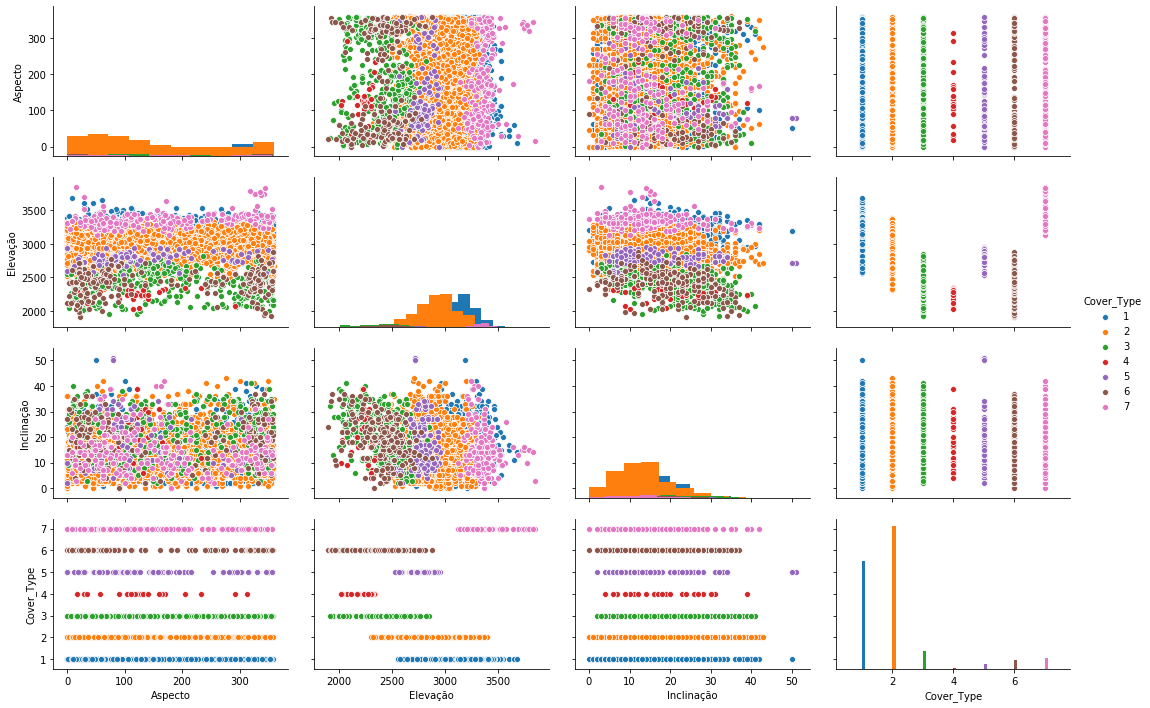

In [128]:
amostra = df_covtypes[np.random.rand(len(df_covtypes)) < 0.01]
df_amostra = amostra[['Aspecto','Elevação','Inclinação', 'Cover_Type']]
sns.pairplot(df_amostra, hue='Cover_Type', diag_kind='hist', aspect=1.5)

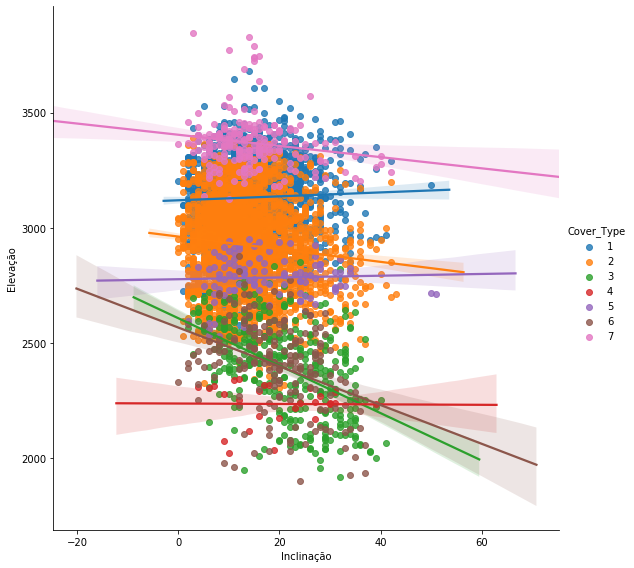

In [141]:
sns.lmplot('Inclinação','Elevação',  df_amostra, hue='Cover_Type', height=8)

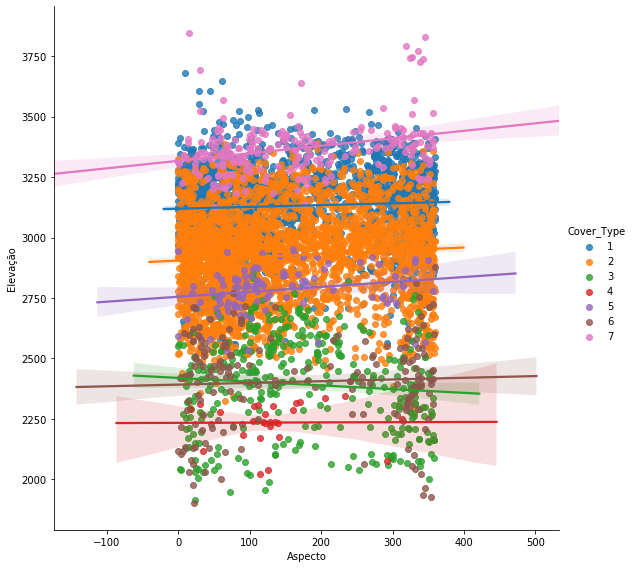

In [142]:
sns.lmplot('Aspecto','Elevação',  df_amostra, hue='Cover_Type', height=8)

In [0]:
scaler = StandardScaler()
predict = scaler.fit_transform(df['data'])
target = df['target']

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Indique o método escolhido*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*